#**STROKE PREDICTION**

In [2]:
# MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# IMPORT BASE LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

In [4]:
#IMPORT DATASET
df = pd.read_csv('/content/drive/MyDrive/07 - WEEK 7/healthcare-dataset-stroke-data.csv')
display( df.head() )
print()
display( df.info() )
print()
display( df.describe(include='all') )

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
#listing duplicate rows
df.duplicated().sum()

0

In [6]:
#listing columns with missing data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#distribution of target
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#CLEANING DATA - (by column)

##(1)  ID column will be dropped.  It has no relation to stroke prediction.

In [8]:
df.drop(columns='id', inplace=True)

##(2) Gender

In [9]:
#quick view of data
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [10]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
#dropping row labled "Other"
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [12]:
df.drop(3116, inplace=True)

In [13]:
#confirming change
display( df.shape )
print()
df['gender'].value_counts()

(5109, 11)

Female    2994
Male      2115
Name: gender, dtype: int64

##(3) AGE

In [14]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [15]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [16]:
df['age'].describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [17]:
df[ (df['age']<1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [18]:
df[ (df['age']>=1) & (df['age']<2) ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
562,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
597,Female,1.08,0,0,No,children,Rural,60.53,17.5,Unknown,0
607,Female,1.80,0,0,No,children,Urban,102.34,17.0,Unknown,0
684,Female,1.80,0,0,No,children,Urban,130.61,14.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4860,Female,1.08,0,0,No,children,Urban,109.33,18.2,Unknown,0
4934,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0


In [19]:
df[ (df['age']>=2) & (df['age']<3) ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
437,Female,2.0,0,0,No,children,Rural,92.48,18.0,Unknown,0
683,Female,2.0,0,0,No,children,Rural,79.89,31.6,Unknown,0
750,Male,2.0,0,0,No,children,Rural,73.62,20.8,Unknown,0
783,Male,2.0,0,0,No,children,Urban,93.88,17.4,Unknown,0
830,Male,2.0,0,0,No,children,Rural,109.10,20.0,Unknown,0
856,Male,2.0,0,0,No,children,Rural,56.77,20.9,Unknown,0
986,Female,2.0,0,0,No,children,Rural,165.11,18.0,Unknown,0
1132,Male,2.0,0,0,No,children,Rural,103.25,19.4,Unknown,0
1182,Female,2.0,0,0,No,children,Rural,125.68,20.1,Unknown,0
1185,Female,2.0,0,0,No,children,Urban,120.85,16.2,Unknown,0


It looks like children with ages less than 2 have been given fractional age values on purpose.  This is likely to gain more accuracy in for the younger age range from 0 to 2.  I will not modifiy these values.

##(4) HYPERTENSION

In [20]:
def get_values(column_name=''):
  display( df.head(1) )
  print('-------------VALUE_COUNTS()---------------')
  display( df[column_name].value_counts() )
  print('\n-------------DESCRIBE()---------------------')
  display( df[column_name].describe() )

In [21]:
get_values('hypertension')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


0    4611
1     498
Name: hypertension, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean        0.097475
std         0.296633
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

##(5) HEART_DISEASE

In [22]:
get_values('heart_disease')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


0    4833
1     276
Name: heart_disease, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean        0.054022
std         0.226084
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64

##(6) EVER_MARRIED

In [23]:
get_values('ever_married')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


Yes    3353
No     1756
Name: ever_married, dtype: int64


-------------DESCRIBE()---------------------


count     5109
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object

##(7) WORK_TYPE

In [24]:
get_values('work_type')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


-------------DESCRIBE()---------------------


count        5109
unique          5
top       Private
freq         2924
Name: work_type, dtype: object

##(8) RESIDENCE_TYPE

In [25]:
get_values('Residence_type')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


-------------DESCRIBE()---------------------


count      5109
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object

##(9) AVG_GLUCOSE_LEVEL

In [26]:
get_values('avg_glucose_level')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

##(10) BMI

In [27]:
get_values('bmi')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


-------------DESCRIBE()---------------------


count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

##(11) SMOKING_STATUS

In [28]:
get_values('smoking_status')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


-------------DESCRIBE()---------------------


count             5109
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

##(12) STROKE

In [29]:
get_values('stroke')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


-------------VALUE_COUNTS()---------------


0    4860
1     249
Name: stroke, dtype: int64


-------------DESCRIBE()---------------------


count    5109.000000
mean        0.048738
std         0.215340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

##Confirming column data types

In [30]:
display( df.head() )
print()
df.info()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


All column data types are as they should be.

#TRAIN TEST SPLIT

In [31]:
y = df['stroke']  #target
X = df.drop(columns='stroke')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)

#DATA PROCESSING

In [32]:
#viewing data that neeeds to be imputed.
display( df.info() )
print()
display( df.head() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


None

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
#IMPUTING AND PROCESSING NUMERIC COLUMNS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

mean_imputer = SimpleImputer(strategy='mean')
most_freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

#Column Selector for number columns
avg_col_selector = ['age', 'avg_glucose_level', 'bmi']
most_freq_col_selector = ['hypertension', 'heart_disease']

#Pipeline
avg_pipe = make_pipeline(mean_imputer, scaler)
most_freq_pipe = make_pipeline(most_freq_imputer, scaler)

#Tuple
avg_num_tuple = (avg_pipe, avg_col_selector)
most_freq_tuple = (most_freq_pipe, most_freq_col_selector)

In [34]:
#IMPUTING AND PROCESSING CATEGORICAL COLUMNS
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Column selector for categorical columns
cat_selector = make_column_selector(dtype_include='object')

#Pipeline
cat_pipe = make_pipeline(most_freq_imputer, ohe)

#Tuple
cat_tuple = (cat_pipe, cat_selector)

In [35]:
cat_selector(X_train)  #check category column selector

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [36]:
preprocessor = make_column_transformer(cat_tuple, avg_num_tuple, most_freq_tuple, remainder='passthrough')

#***Classification Models***

##KNN Model - (baseline without parameter tuning)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  #instance of knn model

knn_pipe = make_pipeline(preprocessor, knn)   #model pipeline

knn_pipe.fit(X_train, y_train)   #make model learn from data relations

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd480ff6fe0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [38]:
knn_X_train_pred = knn_pipe.predict(X_train)   #knn prediction model on training data
knn_X_test_pred = knn_pipe.predict(X_test)   #knn prediction model on test data

### Model Evaluation

In [39]:
def eval_class(predicted_X_train, predicted_X_test, y_train=y_train, y_test=y_test, class_labels=['no', 'yes']):
  from sklearn.metrics import classification_report

  print( 'CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA\n', classification_report(y_train, predicted_X_train, target_names=class_labels) )
  print()
  print( 'CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA\n', classification_report(y_test, predicted_X_test, target_names=class_labels) )
  print()
  #Displaying Confusion Matrix for further evaluation.
  from sklearn.metrics import ConfusionMatrixDisplay
  import matplotlib.pyplot as plt
  #Confusion Matrix from data Predicted on Train Data
  ConfusionMatrixDisplay.from_predictions(y_train, predicted_X_train, normalize='true',
                                         display_labels=class_labels, cmap='Reds');
  plt.suptitle('Confusion Matrix from data Predicted on TRAIN Data');
  
  #Confusion Matrix from data Predicted on Test Data
  ConfusionMatrixDisplay.from_predictions(y_test, predicted_X_test, normalize='true',
                                          display_labels=class_labels, cmap='Greens');
  plt.suptitle('Confusion Matrix from data Predicted on TEST Data');

CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3644
      Stroke       0.33      0.02      0.03       187

    accuracy                           0.95      3831
   macro avg       0.64      0.51      0.50      3831
weighted avg       0.92      0.95      0.93      3831


CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1216
      Stroke       0.20      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.58      0.51      0.50      1278
weighted avg       0.92      0.95      0.93      1278




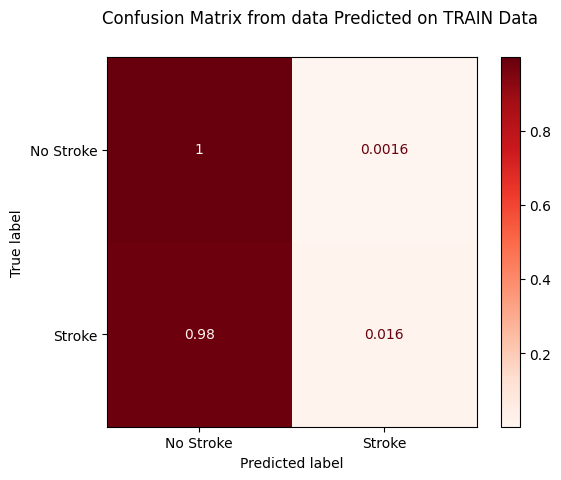

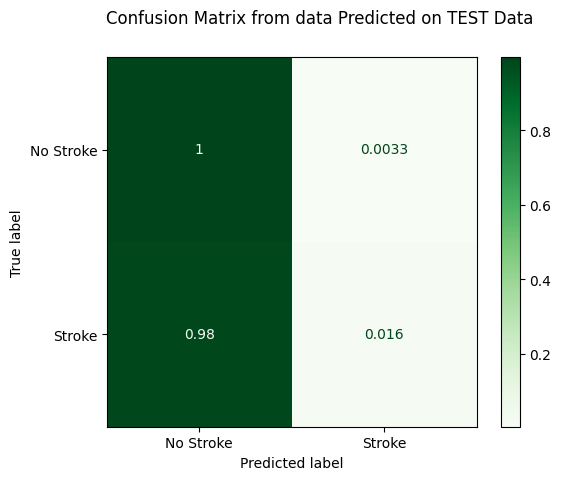

In [40]:
eval_class(knn_X_train_pred, knn_X_test_pred, class_labels=['No Stroke', 'Stroke'])

#Adjusting for imbalaced target column in dataset.

In [41]:
df['stroke'].value_counts(normalize=True)

0    0.951262
1    0.048738
Name: stroke, dtype: float64

##Exploring Random Undersampling

In [42]:
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=7)

undersampled_knn_pipe = make_sampler_pipeline(preprocessor, under_sampler, knn)   #model pipeline

undersampled_knn_pipe.fit(X_train, y_train)   #make model learn from data relations

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd480ff6fe0>),
                                                 ('pipeli...
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('randomundersampler', RandomUnderSampler(random_state=7)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [43]:
undersampled_knn_X_train_pred = undersampled_knn_pipe.predict(X_train)   #knn prediction model on training data
undersampled_knn_X_test_pred = undersampled_knn_pipe.predict(X_test)   #knn prediction model on test data

CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA
               precision    recall  f1-score   support

   No Stroke       0.99      0.65      0.79      3644
      Stroke       0.11      0.83      0.19       187

    accuracy                           0.66      3831
   macro avg       0.55      0.74      0.49      3831
weighted avg       0.94      0.66      0.76      3831


CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA
               precision    recall  f1-score   support

   No Stroke       0.98      0.65      0.78      1216
      Stroke       0.10      0.81      0.18        62

    accuracy                           0.65      1278
   macro avg       0.54      0.73      0.48      1278
weighted avg       0.94      0.65      0.75      1278




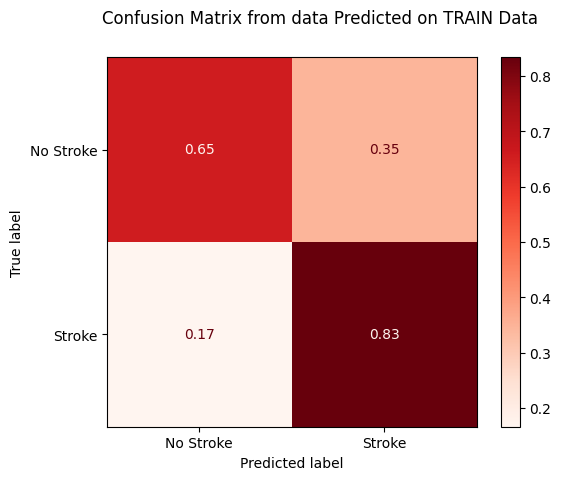

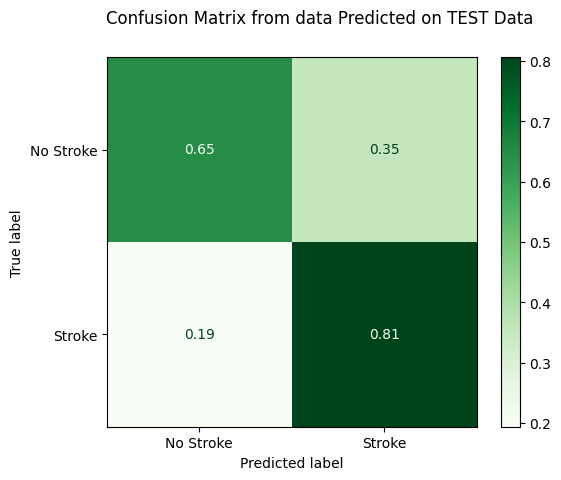

In [44]:
eval_class(undersampled_knn_X_train_pred, undersampled_knn_X_test_pred, class_labels=['No Stroke', 'Stroke'])

#Exploring Oversampling using SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7)

smote_knn_pipe = make_sampler_pipeline(preprocessor, smote, knn)   #model pipeline

smote_knn_pipe.fit(X_train, y_train)   #make model learn from data relations

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd480ff6fe0>),
                                                 ('pipeli...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('smote', SMOTE(random_state=7)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [46]:
smote_knn_X_train_pred = smote_knn_pipe.predict(X_train)   #knn prediction model on training data
smote_knn_X_test_pred = smote_knn_pipe.predict(X_test)   #knn prediction model on test data

CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA
               precision    recall  f1-score   support

   No Stroke       1.00      0.88      0.94      3644
      Stroke       0.30      1.00      0.46       187

    accuracy                           0.89      3831
   macro avg       0.65      0.94      0.70      3831
weighted avg       0.97      0.89      0.91      3831


CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA
               precision    recall  f1-score   support

   No Stroke       0.96      0.85      0.90      1216
      Stroke       0.11      0.39      0.18        62

    accuracy                           0.83      1278
   macro avg       0.54      0.62      0.54      1278
weighted avg       0.92      0.83      0.87      1278




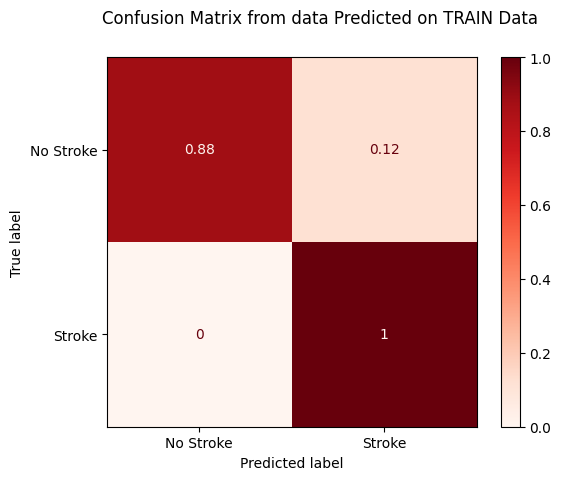

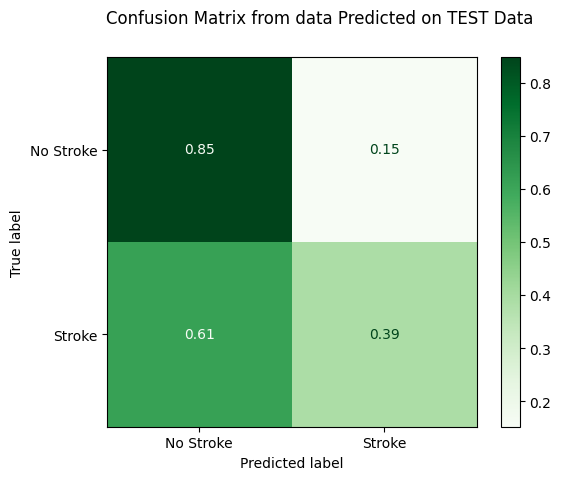

In [47]:
eval_class(smote_knn_X_train_pred, smote_knn_X_test_pred, class_labels=['No Stroke', 'Stroke'])

---
---
---

Undersampled strategy produced better results over SMOTE.  I will hypertune undersampled knn model.

`undersampled_knn_X_train_pred = undersampled_knn_pipe.predict(X_train)   #knn prediction model on training data
undersampled_knn_X_test_pred = undersampled_knn_pipe.predict(X_test)   #knn prediction model on test data`

###KNN Model - (with tuning)

In [48]:
undersampled_knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd480ff6fe0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                   

In [49]:
#I will tune KNN model with these parameters.
knn_params = {'kneighborsclassifier__n_neighbors': list( range(1,21,1) ),
              'kneighborsclassifier__algorithm': ['ball_tree', 'kd_tree'],
              'kneighborsclassifier__weights':['uniform','distance'],
              'kneighborsclassifier__leaf_size': [30, 60],
              'kneighborsclassifier__p': [1,2],
              'kneighborsclassifier__metric': ['l1','l2']}

In [50]:
#Tuning with GridSearchCV
knn_gridsearch = GridSearchCV(undersampled_knn_pipe, knn_params)
knn_gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x...
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__algorithm': ['ball_tree',
                                                             'kd_tree'],
                         'kneighborsclassifier__leaf_size': [30, 60],
                         'kneighborsclassifier__metric': ['l1', 'l2'],
                         'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [51]:
knn_gridsearch.best_params_   #best paramaters found by gridsearch of knn

{'kneighborsclassifier__algorithm': 'ball_tree',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'l1',
 'kneighborsclassifier__n_neighbors': 2,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [52]:
knn_gs_best_estimator = knn_gridsearch.best_estimator_

In [53]:
#fitting knn model with best_estimator from gridsearch
knn_final_X_train_prediction = knn_gs_best_estimator.predict(X_train)
knn_final_X_test_prediction = knn_gs_best_estimator.predict(X_test)

CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA
               precision    recall  f1-score   support

   No Stroke       0.98      0.82      0.89      3644
      Stroke       0.16      0.65      0.25       187

    accuracy                           0.81      3831
   macro avg       0.57      0.74      0.57      3831
weighted avg       0.94      0.81      0.86      3831


CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA
               precision    recall  f1-score   support

   No Stroke       0.96      0.81      0.88      1216
      Stroke       0.10      0.40      0.16        62

    accuracy                           0.79      1278
   macro avg       0.53      0.61      0.52      1278
weighted avg       0.92      0.79      0.85      1278




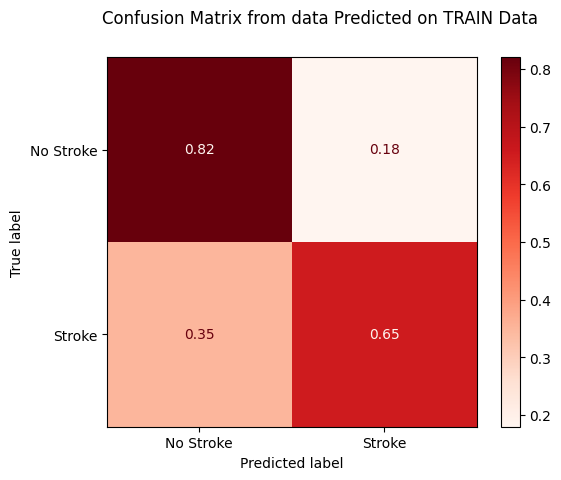

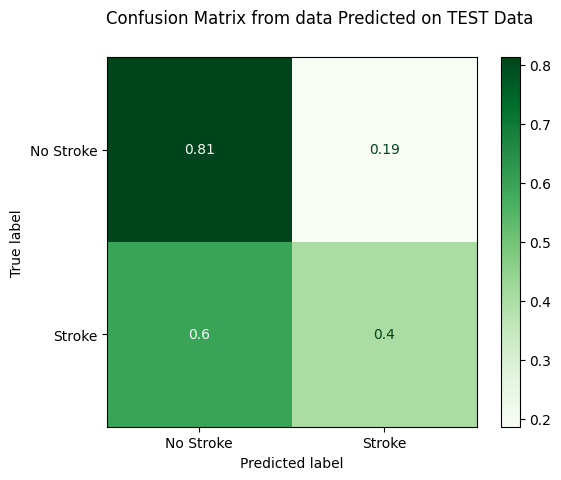

In [54]:
eval_class(knn_final_X_train_prediction, knn_final_X_test_prediction, class_labels=['No Stroke', 'Stroke'])

#Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=7)  #instance of rfc model

rfc_pipe = make_pipeline(preprocessor, rfc)   #model pipeline

rfc_pipe.fit(X_train, y_train)   #make model learn from data relations

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd480ff6fe0>),
                                                 ('pipeli...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=7))])

In [56]:
rfc_X_train_pred = rfc_pipe.predict(X_train)   #knn prediction model on training data
rfc_X_test_pred = rfc_pipe.predict(X_test)   #knn prediction model on test data

##Model Evaluation

CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA
               precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3644
      Stroke       1.00      1.00      1.00       187

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831


CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      1216
      Stroke       1.00      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.98      0.51      0.50      1278
weighted avg       0.95      0.95      0.93      1278




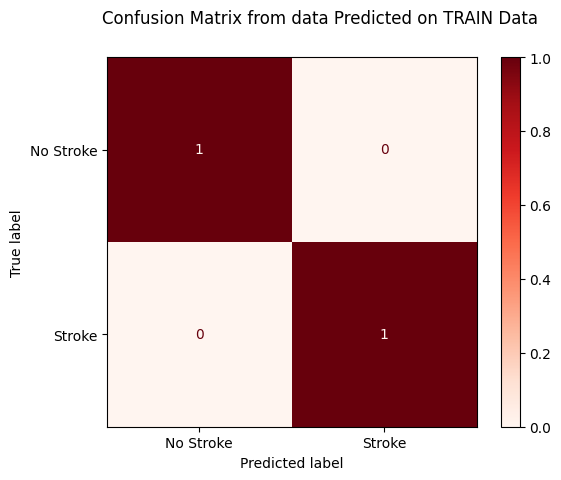

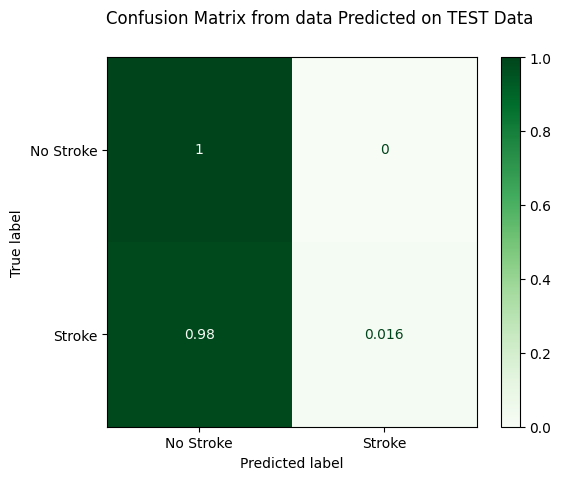

In [57]:
eval_class(rfc_X_train_pred, rfc_X_test_pred, class_labels=['No Stroke', 'Stroke'])

In [58]:
rfc_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fd480ff6fe0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                   

In [59]:
%%time
rfc_params = {'randomforestclassifier__n_estimators': [100,200],
              'randomforestclassifier__criterion': ["gini", "entropy", "log_loss"],
              'randomforestclassifier__min_samples_leaf': [1,10,20],
              'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample']}

rfc_gridsearch = GridSearchCV(rfc_pipe, rfc_params)
rfc_gridsearch.fit(X_train, y_train)

CPU times: user 2min, sys: 355 ms, total: 2min 1s
Wall time: 2min 3s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x...
                                                                         ['hypertension',
                                                                          'heart_disease'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=7))]),
             param_grid={'randomforestclassifier__class_weight': ['balanced',
                                                                  'balanced_subsample'],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'randomforestclassifier__min_samples_leaf': [1, 10,
                                                                      20],
                         'randomforestclassifier__n_estimators': [100, 200]})

In [60]:
rfc_gridsearch.best_params_  #viewing best parameters found

{'randomforestclassifier__class_weight': 'balanced_subsample',
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 100}

In [61]:
best_rfc = rfc_gridsearch.best_estimator_

In [62]:
best_rfc_X_train_predictions = best_rfc.predict(X_train)
best_rfc_X_test_predictions = best_rfc.predict(X_test)

CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA
               precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3644
      Stroke       1.00      1.00      1.00       187

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831


CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA
               precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1216
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278




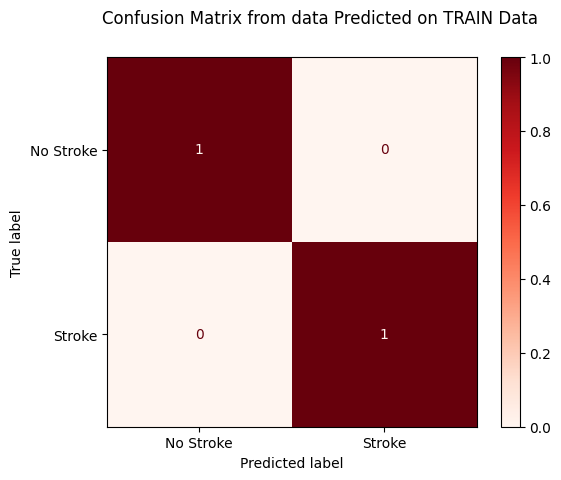

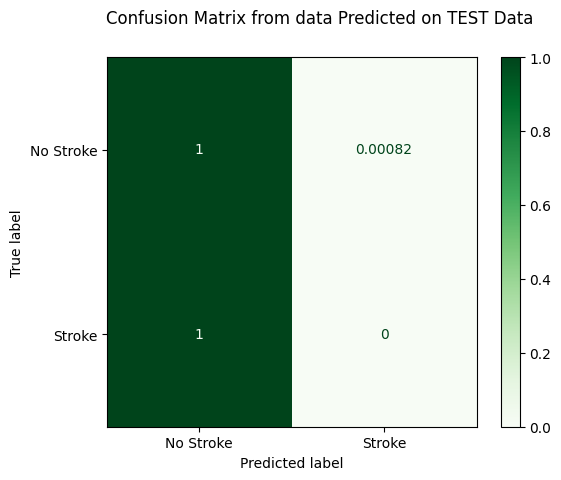

In [63]:
eval_class(best_rfc_X_train_predictions, best_rfc_X_test_predictions, class_labels=['No Stroke', 'Stroke'])

#XGBoost Classifier

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb_pipe = make_pipeline(preprocessor, xgb)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd480ff6fe0>),
                                                 ('pipeli...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [65]:
xgb_X_train_pred = xgb_pipe.predict(X_train)
xgb_X_test_pred = xgb_pipe.predict(X_test)

##Evaluate XGBoost

CLASSIFICATION REPORT FROM PREDICTIONS ON TRAIN DATA
               precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3644
      Stroke       1.00      0.96      0.98       187

    accuracy                           1.00      3831
   macro avg       1.00      0.98      0.99      3831
weighted avg       1.00      1.00      1.00      3831


CLASSIFICATION REPORT FROM PREDICTIONS ON TEST DATA
               precision    recall  f1-score   support

   No Stroke       0.96      0.99      0.97      1216
      Stroke       0.35      0.10      0.15        62

    accuracy                           0.95      1278
   macro avg       0.65      0.54      0.56      1278
weighted avg       0.93      0.95      0.93      1278




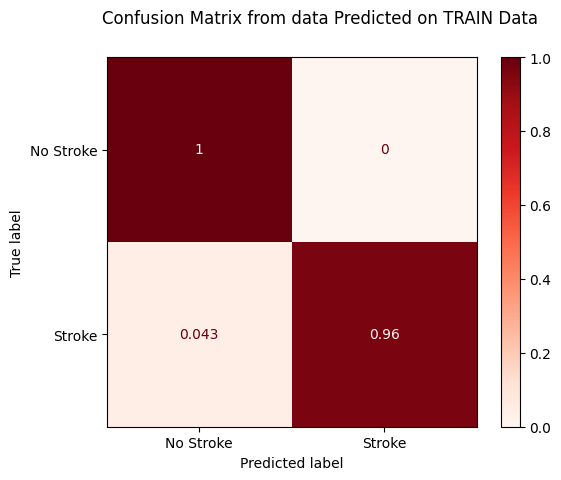

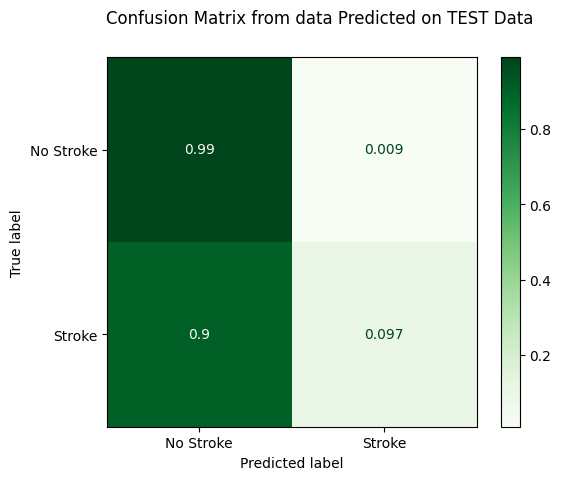

In [66]:
eval_class(xgb_X_train_pred, xgb_X_test_pred, class_labels=['No Stroke', 'Stroke'])

The model did well at predicting those that did not have a stroke (No Stroke).  But this is becasue the dataset is highly imbalaced to be biased towards the (No Stroke) side.